<a href="https://colab.research.google.com/github/koreabao/public_data/blob/main/%EC%A3%BC%EA%B0%80%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

In [10]:
ss=pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/005930.KS?period1=1495152000&period2=1652918400&interval=1d&events=history&includeAdjustedClose=true')

In [11]:
ss

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-19,45640.0,45780.0,44720.0,44720.0,38738.121094,15762350
1,2017-05-22,45040.0,45380.0,44760.0,45100.0,39067.292969,17643550
2,2017-05-23,45400.0,45580.0,44900.0,44920.0,38911.371094,12607050
3,2017-05-24,44860.0,45300.0,44800.0,44880.0,38876.714844,8675400
4,2017-05-25,45160.0,45680.0,44800.0,45680.0,39569.710938,13044800
...,...,...,...,...,...,...,...
1221,2022-05-13,65300.0,66700.0,65200.0,66500.0,66500.000000,14551536
1222,2022-05-16,67100.0,67400.0,66100.0,66300.0,66300.000000,11937555
1223,2022-05-17,66600.0,67900.0,66600.0,67600.0,67600.000000,15680447
1224,2022-05-18,68300.0,68700.0,67600.0,68100.0,68100.000000,16486319


In [12]:
ss['avg'] = (ss['High']+ss['Low'])/2
ss

,Date,Open,High,Low,Close,Adj Close,Volume,avg
0,2017-05-19,45640.0,45780.0,44720.0,44720.0,38738.121094,15762350,45250.0
1,2017-05-22,45040.0,45380.0,44760.0,45100.0,39067.292969,17643550,45070.0
2,2017-05-23,45400.0,45580.0,44900.0,44920.0,38911.371094,12607050,45240.0
3,2017-05-24,44860.0,45300.0,44800.0,44880.0,38876.714844,8675400,45050.0
4,2017-05-25,45160.0,45680.0,44800.0,45680.0,39569.710938,13044800,45240.0
...,...,...,...,...,...,...,...,...
1221,2022-05-13,65300.0,66700.0,65200.0,66500.0,66500.000000,14551536,65950.0
1222,2022-05-16,67100.0,67400.0,66100.0,66300.0,66300.000000,11937555,66750.0
1223,2022-05-17,66600.0,67900.0,66600.0,67600.0,67600.000000,15680447,67250.0
1224,2022-05-18,68300.0,68700.0,67600.0,68100.0,68100.000000,16486319,68150.0


In [13]:
ss1=ss.iloc[:,[0,-1]]
#ss1=ss[['Date','avg']]
ss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1226 non-null   object 
 1   avg     1226 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.3+ KB


In [14]:
ss1['Date']=pd.to_datetime(ss1['Date'])
ss1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1226 entries, 0 to 1225
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1226 non-null   datetime64[ns]
 1   avg     1226 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.3 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
ss1.columns = ['ds','y']
ss1

,ds,y
0,2017-05-19,45250.0
1,2017-05-22,45070.0
2,2017-05-23,45240.0
3,2017-05-24,45050.0
4,2017-05-25,45240.0
...,...,...
1221,2022-05-13,65950.0
1222,2022-05-16,66750.0
1223,2022-05-17,67250.0
1224,2022-05-18,68150.0


In [21]:
from fbprophet import Prophet                
model = Prophet()                                         

# 2주 앞의 주식가격을 예측하고, 예측 정확도 확인하기

ss1_train = ss1[:-10]     # train data
ss1_test   = ss1[-10:]     # test data

model.fit(ss1_train)                                               
term=model.make_future_dataframe(periods=10, freq='B')    # business day  
prediction=model.predict(term)                 

predS=prediction[['ds', 'yhat']]                                 
predS1=predS.set_index('ds')             # 예측데이터
ss2_test=ss1_test.set_index('ds')        # 실제데이터

precision=pd.concat( [ ss2_test,  predS1 ], axis=1 ) # 파일 통합
precision=precision.dropna()           #  NaN 널값 삭제

import numpy as np
RSME=np.sqrt(((precision['y'] - precision['yhat'])**2).mean())    # RMSE 
print('제곱근 평균 제곱 오차', RSME)

MAPE=(np.abs((precision['y'] - precision['yhat']) /precision['y'])).mean()*100   #평균 절대 백분율 오차 Mean Absolute Percentage Error(MAPE))
print('평균 절대 백분율 오차', MAPE) 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


제곱근 평균 제곱 오차 861.9382002557566
평균 절대 백분율 오차 1.0542434298795593


In [23]:
predS1.tail(10)

,yhat
ds,
2022-05-04,67143.131773
2022-05-05,67031.482251
2022-05-06,66742.472627
2022-05-09,66328.696599
2022-05-10,66315.186625
2022-05-11,66194.939956
2022-05-12,66108.448780
2022-05-13,65852.615658
2022-05-16,65582.245468


In [24]:
ss1_test

,ds,y
1216,2022-05-04,67950.0
1217,2022-05-06,66800.0
1218,2022-05-10,65800.0
1219,2022-05-11,65750.0
1220,2022-05-12,65200.0
1221,2022-05-13,65950.0
1222,2022-05-16,66750.0
1223,2022-05-17,67250.0
1224,2022-05-18,68150.0
1225,2022-05-19,67050.0


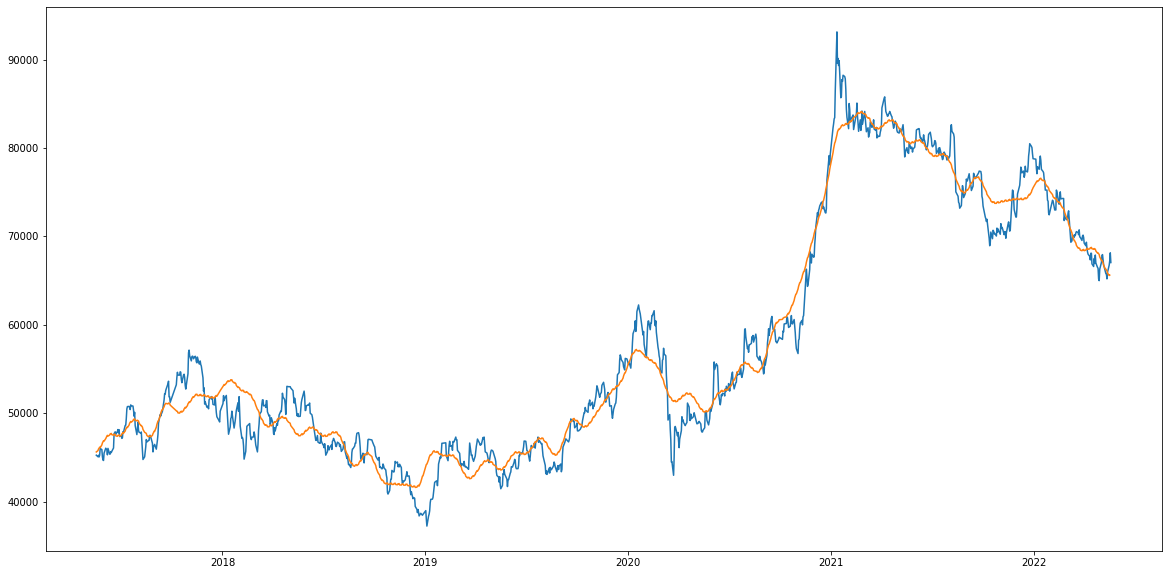

In [25]:
# 예측 결과 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(ss1.set_index('ds'))
plt.plot(predS1)
plt.show()


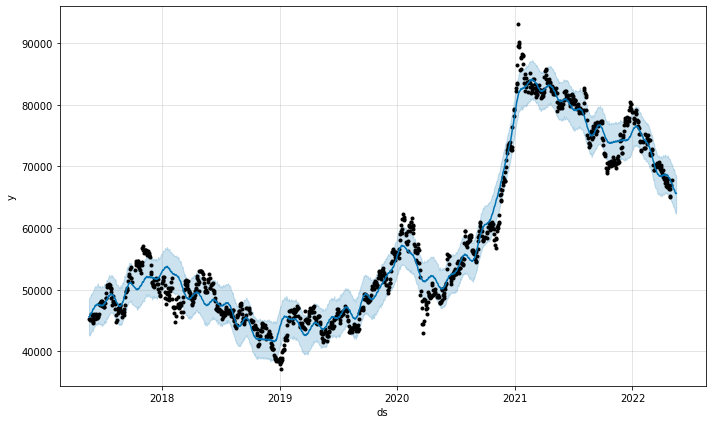

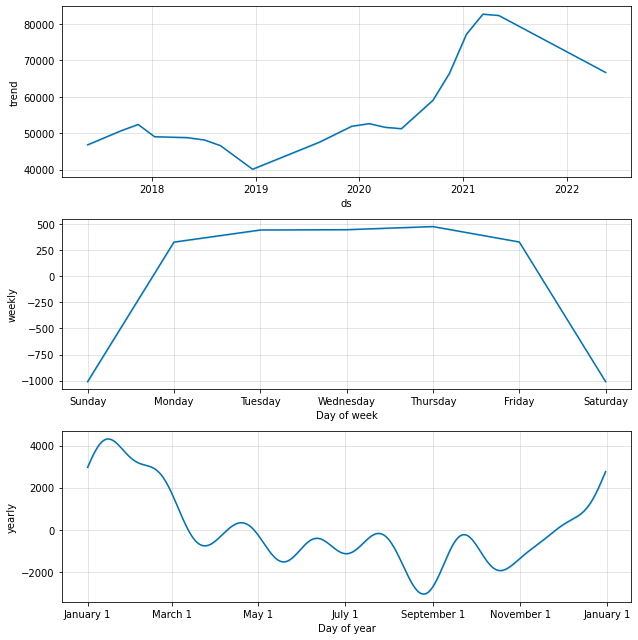

In [26]:
model.plot(prediction);
model.plot_components(prediction);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


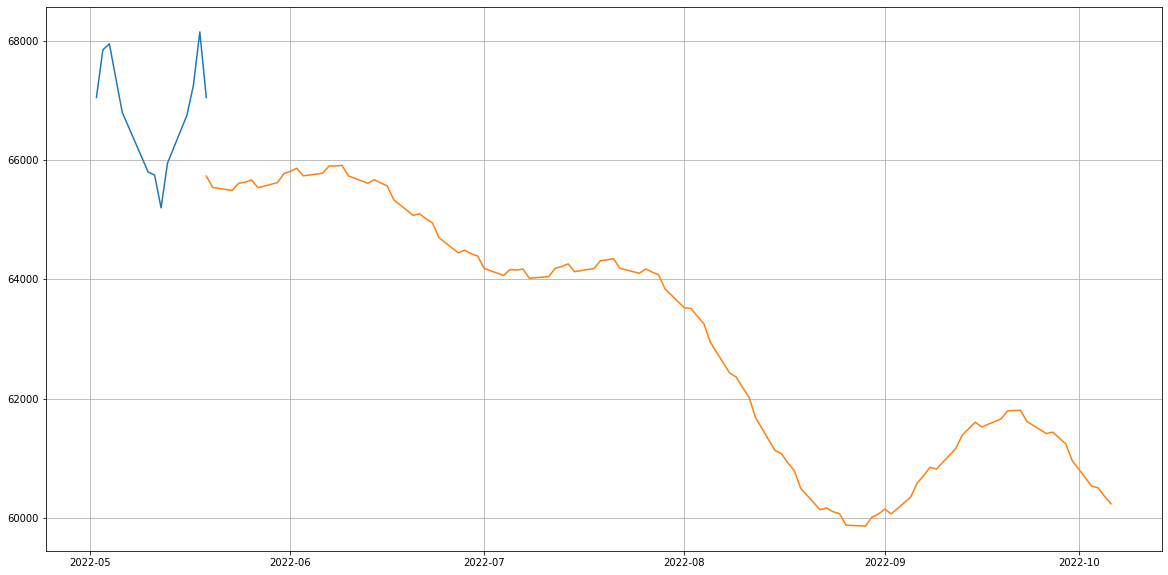

In [28]:
import pandas as pd
ss=pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/005930.KS?period1=1495152000&period2=1652918400&interval=1d&events=history&includeAdjustedClose=true')  # finance.yahoo.com   > samsung electronics >  historical data
ss['avg']=(ss['High'] + ss['Low'])/2   
ss1=ss.iloc[:, [0, -1]]
ss1['Date']=pd.to_datetime(ss1['Date'])
ss1.columns=['ds','y']

from fbprophet import Prophet                
model = Prophet()                                         

model.fit(ss1)                                               
term=model.make_future_dataframe(periods=100, freq='B')   
prediction=model.predict(term)                 

predS=prediction[['ds', 'yhat']]  
predIDX=predS.set_index('ds')
ssIDX=ss1.set_index('ds')

# 예측 결과 시각화하기
from datetime import date
c_day=date.today().strftime("%Y-%m-%d")

import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(ssIDX['2022-05-01':c_day])
plt.plot(predIDX[c_day:])
plt.grid(True)
plt.show()
